# Heart Disease Dataset

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

- age
- sex (1 = male; 0 = female)
- chest pain type (4 values)
- resting blood pressure (in mm Hg on admission to the hospital)
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Load Dataset

In [1]:
import os
from pathlib import Path
dataset_folder = Path("./../../data/heart-disease") #cwd is the notebook folder

if not dataset_folder.exists():
    os.mkdir(dataset_folder)
else:
    print("Folder already exists.")

Folder already exists.


In [2]:
import pandas as pd

In [3]:
dataset_path = dataset_folder / "heart.csv"

In [4]:
df = pd.DataFrame()

if dataset_path.exists():
    df = pd.read_csv(dataset_path)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Column distributions

In [6]:
from matplotlib import pyplot as plt

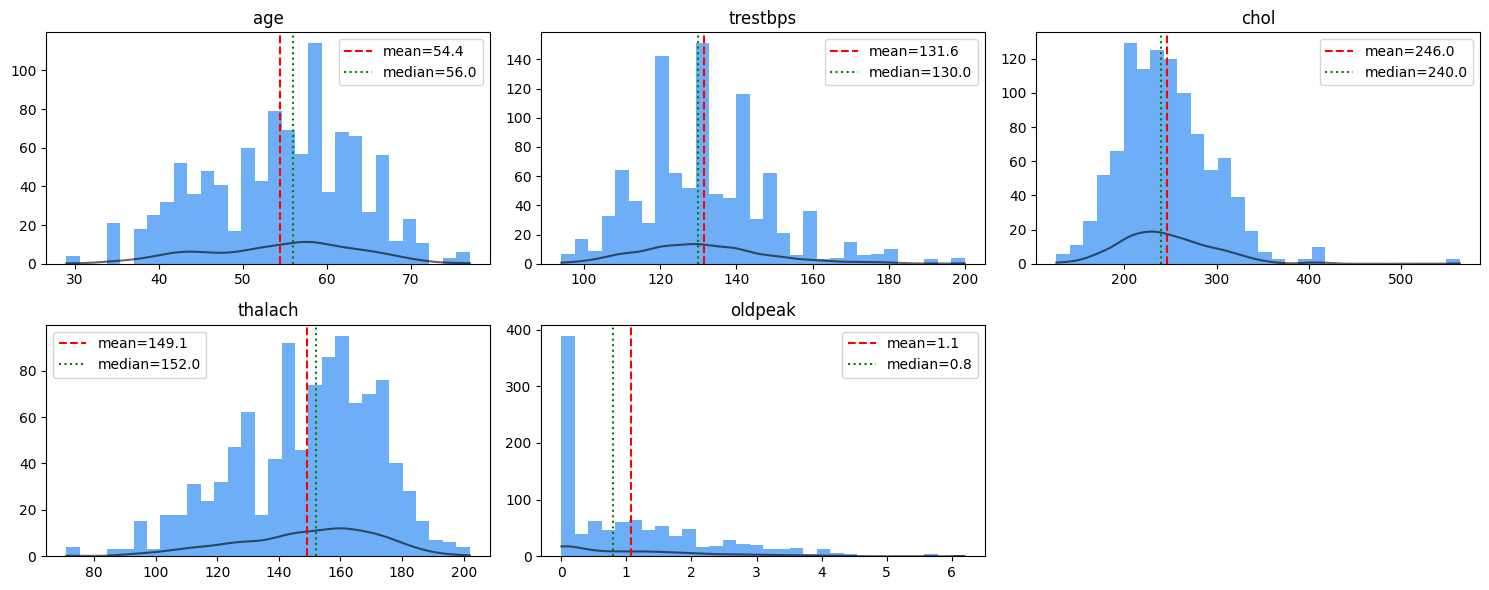

In [7]:
import math
import numpy as np

# Numeric columns
numeric_cols = [c for c in df.select_dtypes(include=['number']).columns]
continuous_cols = [c for c in numeric_cols if df[c].nunique() > 10]
small_num_as_cat = [c for c in numeric_cols if df[c].nunique() <= 10]

# Categorical columns
categorical_cols = [c for c in df.select_dtypes(include=['object', 'category']).columns]
categorical_cols += [c for c in small_num_as_cat if c not in categorical_cols]

if continuous_cols:
    n = len(continuous_cols)
    ncols = 3
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
    axes = axes.flatten()
    for ax, col in zip(axes, continuous_cols):
        data = df[col].dropna()
        ax.hist(data, bins=30, color='#5DA5F7', alpha=0.9)

        # KDE
        try:
            from scipy.stats import gaussian_kde
            kd = gaussian_kde(data)
            xs = np.linspace(data.min(), data.max(), 200)
            scale = len(data) * (xs[1] - xs[0])
            ax.plot(xs, kd(xs) * scale, color='k', alpha=0.6)
        except Exception:
            pass

        ax.axvline(data.mean(), color='red', linestyle='--', label=f"mean={data.mean():.1f}")
        ax.axvline(data.median(), color='green', linestyle=':', label=f"median={data.median():.1f}")
        ax.set_title(col)
        ax.legend()
    # remove unused axes
    for ax in axes[len(continuous_cols):]:
        fig.delaxes(ax)
    plt.tight_layout()
    plt.show()

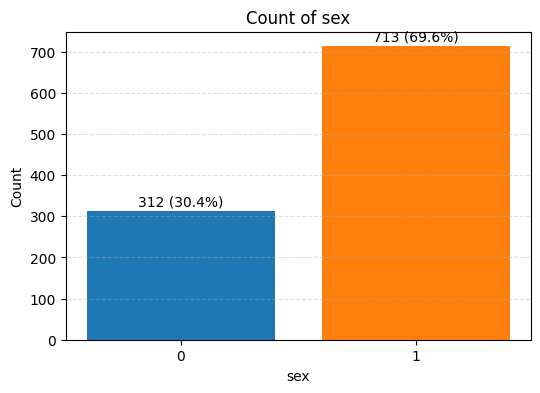

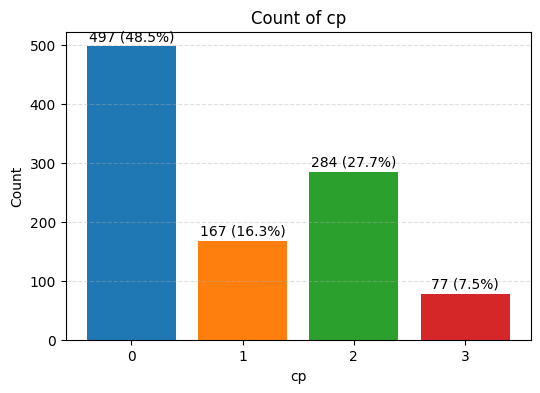

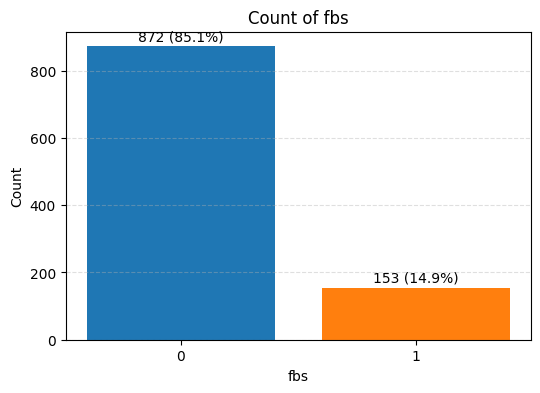

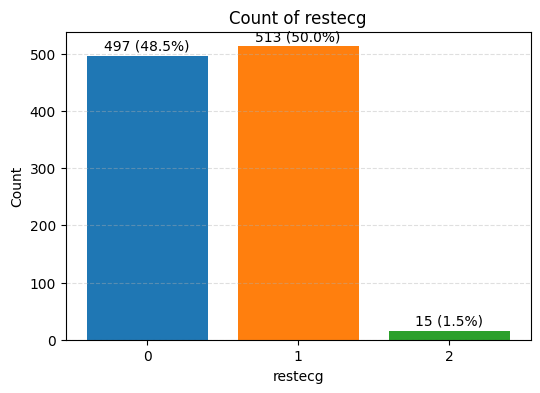

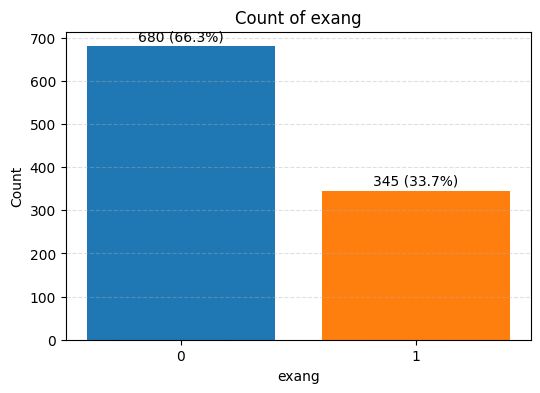

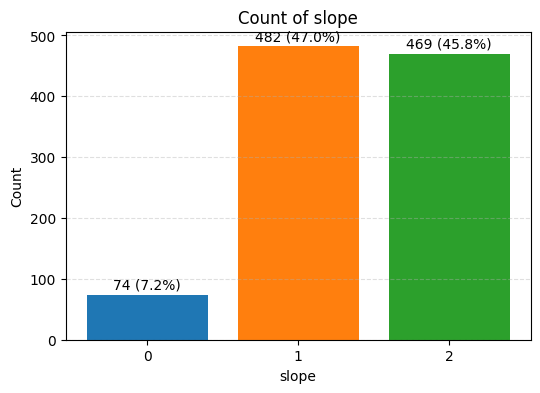

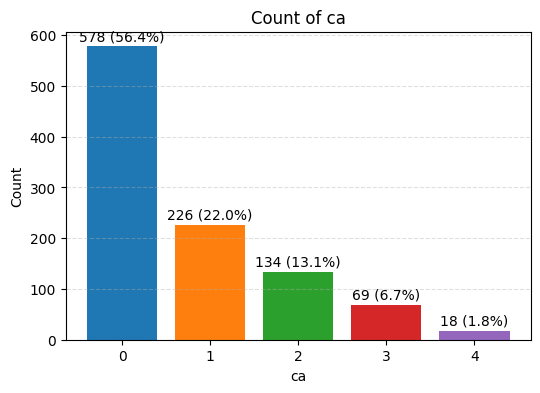

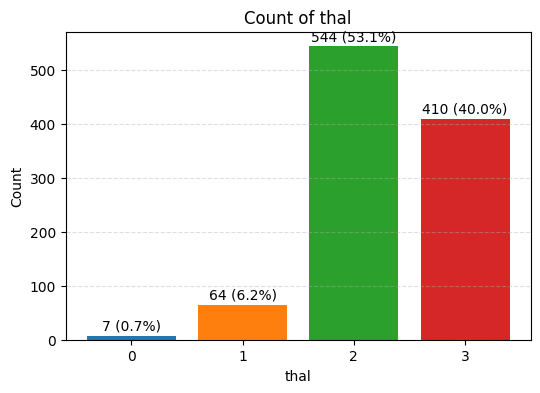

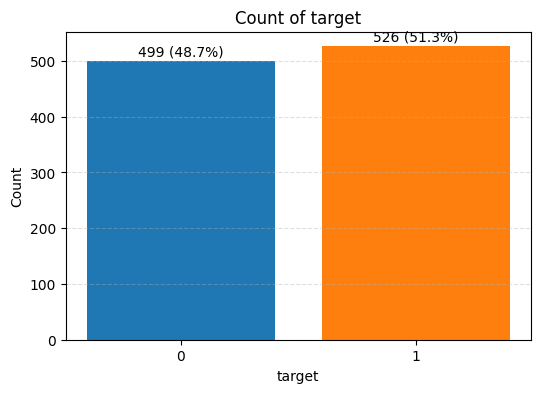

In [8]:
if categorical_cols:
    for col in categorical_cols:
        counts = df[col].value_counts().sort_index()
        labels = [str(x) for x in counts.index]
        plt.figure(figsize=(6, 4))
        cmap = plt.get_cmap('tab10')
        colors = [cmap(i % 10) for i in range(len(labels))]

        bars = plt.bar(labels, counts.values, color=colors)
        plt.title(f'Count of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.grid(axis='y', linestyle='--', alpha=0.4)

        total = counts.values.sum()
        for bar, val in zip(bars, counts.values):
            pct = val / total * 100
            plt.text(bar.get_x() + bar.get_width() / 2,
                        val + max(counts.values) * 0.01,
                        f"{int(val)} ({pct:.1f}%)",
                        ha='center', va='bottom')
        plt.show()

## Correlation of each column to the target col

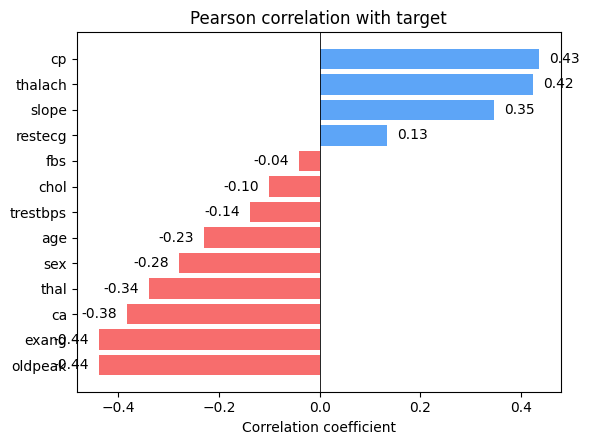

In [9]:
# Pearson correlation
corr = df.corr()['target'].drop('target').sort_values()

plt.figure(figsize=(6, max(4, len(corr) * 0.35)))
colors = ['#F76D6D' if v < 0 else '#5DA5F7' for v in corr.values]
y_pos = range(len(corr))
plt.barh(y_pos, corr.values, color=colors)
plt.yticks(y_pos, corr.index)
plt.title('Pearson correlation with target')
plt.xlabel('Correlation coefficient')
plt.axvline(0, color='k', linewidth=0.6)

# annotate correlation values
for i, v in enumerate(corr.values):
    x = v + (0.02 if v >= 0 else -0.02)
    ha = 'left' if v >= 0 else 'right'
    plt.text(x, i, f"{v:.2f}", va='center', ha=ha)
plt.tight_layout()
plt.show()